In [22]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
#url = "https://raw.githubusercontent.com/adam-datasci/RiskAnalytics/main/Data/american_bankruptcy.csv?"
url = "Data/american_bankruptcy_normalized.csv"
df = pd.read_csv(url)

In [24]:
industry_summary = df.groupby('Division')['company_name'].nunique().reset_index().rename(columns={'company_name': 'Count'})
industry_summary = industry_summary.sort_values(by='Count', ascending=False)

C:\Users\adamk\AppData\Local\Temp\ipykernel_35800\210178911.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Division', y='Count', data=industry_summary, palette='viridis')


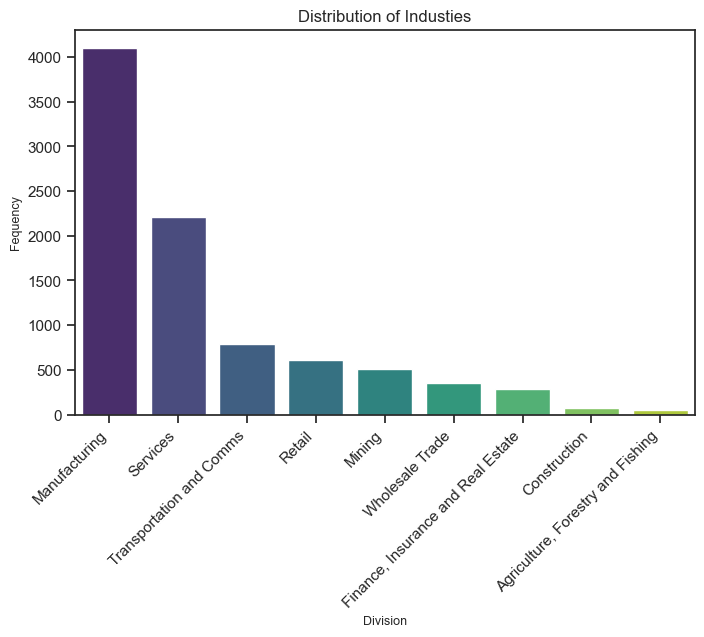

In [25]:
# Create a figure and axis
plt.figure(figsize=(8, 5))

# Create a bar chart
bar_plot = sns.barplot(x='Division', y='Count', data=industry_summary, palette='viridis')

# Add labels and title
plt.xlabel('Division', fontsize=9)
plt.ylabel('Fequency', fontsize=9)
plt.title('Distribution of Industies', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.show()


Filter data by industry and ratios

In [26]:
features = ['wc_to_ta_pct','re_to_ta_pct','ebit_to_ta_pct','mv_to_tl_pct','tr_to_ta_pct','tltd_to_te_pct','np_to_tr_pct','ebitda_to_tr_pct','gp_to_tr_pct','ca_to_cl_pct','np_to_ta_pct','default']
features = ['wc_to_ta_pct','re_to_ta_pct','ca_to_cl_pct','np_to_tr_pct','gp_to_tr_pct','tltd_to_te_pct','np_to_ta_pct','mv_to_tl_pct','Division','default']
features = ['wc_to_ta_pct','re_to_ta_pct','ebit_to_ta_pct','mv_to_tl_pct','tr_to_ta_pct', 'ca_to_cl_pct','Division','default']
#features = ['np_to_tr','ebitda_to_tr','gp_to_tr','Division']
industries = ['Agriculture','Mining','Construction','Manufacturing','Transportation','Wholesale','Retail','Finance','Services','Public']
industries = ['Manufacturing','Wholesale Trade','Services']
industries = ['Manufacturing']

df_filtered = df[df['Division'].isin(industries)]
df_filtered = df_filtered[features]

Create balance data set of defaulters vs non-defaulters and a general sample

In [27]:
#Create a sample of a specific size for the filtered data
sample_size = 1000
df_filtered_sample = df_filtered.sample(sample_size, random_state=1)

#pull out both the default and non-default periods
default_periods = df_filtered[df['default'] == 1]
non_default_periods = df_filtered[df['default'] == 0]
no_rows = default_periods.shape[0]

#Create a balanced dataset
df_sample_non_default = non_default_periods.sample(no_rows, random_state=1)
df_balanced = pd.concat([default_periods, df_sample_non_default])

#Create a features only data set
df_filtered_sample_features = df_filtered_sample.drop(columns=['default','Division'])


C:\Users\adamk\AppData\Local\Temp\ipykernel_35800\2293346927.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  default_periods = df_filtered[df['default'] == 1]
C:\Users\adamk\AppData\Local\Temp\ipykernel_35800\2293346927.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_default_periods = df_filtered[df['default'] == 0]


Create a graph comparing ratios across industries

<Axes: xlabel='ratio_name', ylabel='ratio_value'>

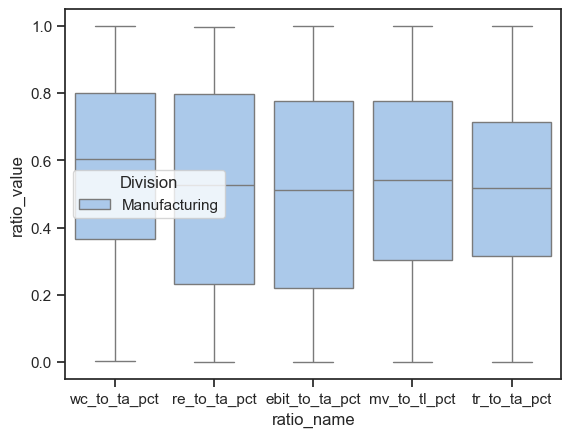

In [28]:
df_filtered_sample_by_divsion = df_filtered_sample.melt(id_vars='Division', value_vars=features[:-2],var_name='ratio_name',value_name='ratio_value')

sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x='ratio_name', y='ratio_value', hue='Division', data=df_filtered_sample_by_divsion)

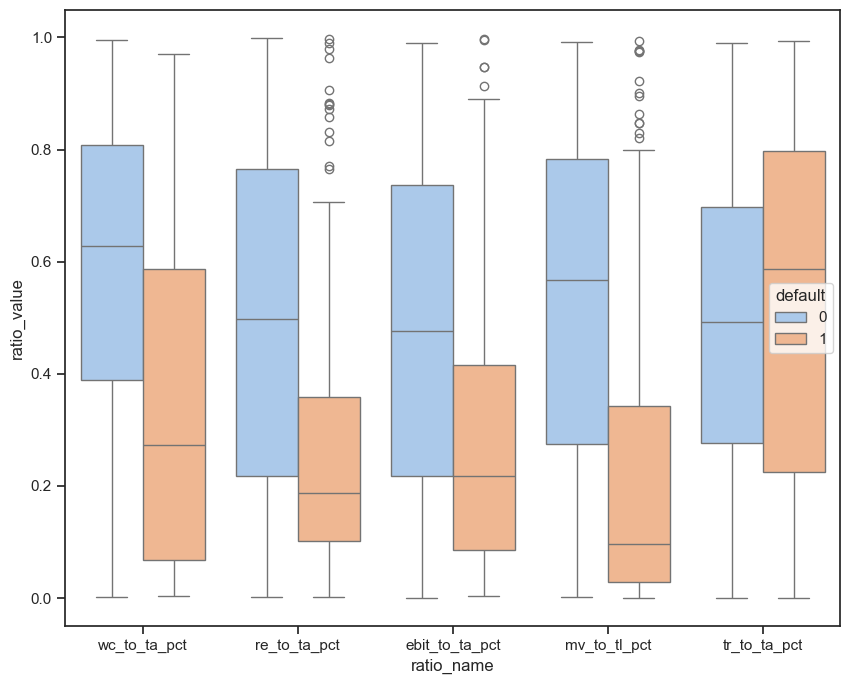

In [29]:
df_filtered_sample_by_status = df_balanced.melt(id_vars='default', value_vars=features[:-2],var_name='ratio_name',value_name='ratio_value')

plt.figure(figsize=(10, 8))
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x='ratio_name', y='ratio_value', hue='default', data=df_filtered_sample_by_status)
plt.show()

                wc_to_ta_pct  re_to_ta_pct  ebit_to_ta_pct  mv_to_tl_pct  \
wc_to_ta_pct        1.000000      0.095906        0.044902      0.479871   
re_to_ta_pct        0.095906      1.000000        0.723534     -0.036948   
ebit_to_ta_pct      0.044902      0.723534        1.000000      0.005148   
mv_to_tl_pct        0.479871     -0.036948        0.005148      1.000000   
tr_to_ta_pct       -0.082916      0.305486        0.393529     -0.301712   

                tr_to_ta_pct  
wc_to_ta_pct       -0.082916  
re_to_ta_pct        0.305486  
ebit_to_ta_pct      0.393529  
mv_to_tl_pct       -0.301712  
tr_to_ta_pct        1.000000  


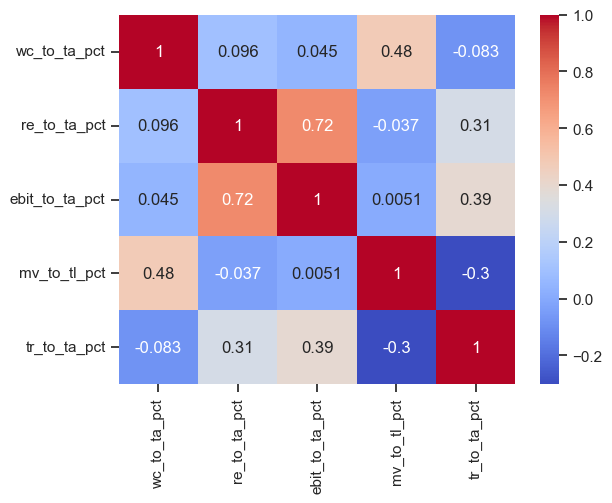

In [30]:
correlation_matrix = df_filtered_sample_features.corr()
print(correlation_matrix)
# Heatmap of the correlation matrix
dataplot = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [31]:
print("Seaborn version:", sns.__version__)

Seaborn version: 0.13.2
